In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk("E:/Smart Meter Data Analytics"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:/Smart Meter Data Analytics\acorn_details.csv
E:/Smart Meter Data Analytics\daily_dataset.csv
E:/Smart Meter Data Analytics\darksky_parameters_documentation.html
E:/Smart Meter Data Analytics\Energy Consumption Prediction.ipynb
E:/Smart Meter Data Analytics\energy.csv
E:/Smart Meter Data Analytics\hc_0.csv
E:/Smart Meter Data Analytics\hc_1.csv
E:/Smart Meter Data Analytics\hc_10.csv
E:/Smart Meter Data Analytics\hc_100.csv
E:/Smart Meter Data Analytics\hc_101.csv
E:/Smart Meter Data Analytics\hc_102.csv
E:/Smart Meter Data Analytics\hc_103.csv
E:/Smart Meter Data Analytics\hc_104.csv
E:/Smart Meter Data Analytics\hc_105.csv
E:/Smart Meter Data Analytics\hc_106.csv
E:/Smart Meter Data Analytics\hc_107.csv
E:/Smart Meter Data Analytics\hc_108.csv
E:/Smart Meter Data Analytics\hc_109.csv
E:/Smart Meter Data Analytics\hc_11.csv
E:/Smart Meter Data Analytics\hc_110.csv
E:/Smart Meter Data Analytics\hc_111.csv
E:/Smart Meter Data Analytics\hc_12.csv
E:/Smart Meter Data Analytics\hc_13.csv

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
for num in range(0,112):
    df = pd.read_csv("E:/Smart Meter Data Analytics/daily_dataset/daily_dataset/block_"+str(num)+".csv")
    df = df[['day','LCLid','energy_sum']]
    df.reset_index()
    df.to_csv("hc_"+str(num)+".csv")

fout= open("energy.csv","a")

for line in open("hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,112):
    f = open("hc_"+str(num)+".csv")
    f.readline() 
    for line in f:
         fout.write(line)
    f.close()
fout.close()

In [4]:
energy = pd.read_csv('energy.csv')
housecount = energy.groupby('day')[['LCLid']].nunique()
energy.head()

C:\Users\krish\AppData\Local\Temp\ipykernel_11532\3413157818.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  energy = pd.read_csv('energy.csv')


,Unnamed: 0,day,LCLid,energy_sum
0,0.0,2012-10-12,MAC000002,7.098
1,1.0,2012-10-13,MAC000002,11.087
2,2.0,2012-10-14,MAC000002,13.223
3,3.0,2012-10-15,MAC000002,10.257
4,4.0,2012-10-16,MAC000002,9.769


In [5]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()

C:\Users\krish\AppData\Local\Temp\ipykernel_11532\2543087553.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  energy = energy.groupby('day')[['energy_sum']].sum()


In [6]:
energy.head()

,day,LCLid
0,2011-11-23,13
1,2011-11-24,25
2,2011-11-25,32
3,2011-11-26,41
4,2011-11-27,41


In [7]:
energy.describe()

,LCLid
count,830.000000
mean,4229.438554
std,1794.940162
min,1.000000
25%,4019.500000
50%,5135.000000
75%,5368.500000
max,5541.000000


In [8]:
### Energy per Household###

energy = df.groupby("day")[["energy_sum"]].sum()
count_of_house = df.groupby("day")[["LCLid"]].nunique()

energy = energy.merge(count_of_house, on="day").reset_index()

energy["energy_per_household"] = energy["energy_sum"] / energy["LCLid"]
energy["day"] = pd.to_datetime(energy["day"])

In [9]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

In [10]:
energy.head()

,day,energy_sum,LCLid,energy_per_household
0,2011-12-07,11.658,1,11.658
1,2011-12-08,21.522,1,21.522
2,2011-12-09,14.564,1,14.564
3,2011-12-10,11.032,1,11.032
4,2011-12-11,18.789,1,18.789


In [11]:
#Weather and holiday data
weather = pd.read_csv("E:/Smart Meter Data Analytics/weather_daily_darksky.csv")
holiday = pd.read_csv("E:/Smart Meter Data Analytics/uk_bank_holidays.csv")

weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [12]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [13]:
weather.head()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,day
0,11.96,123,9.40,0.79,3.88,1016.08,10.87,3.30,0.95,10.87,11.96,1.0,10.87,8.85,10.87,6.48,0.52,2011-11-11
1,8.59,198,4.49,0.56,3.94,1007.71,5.62,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53,2011-12-11
2,10.33,225,5.47,0.85,3.54,1032.76,10.33,13.39,0.74,5.52,10.33,0.0,8.03,8.03,10.33,5.59,0.10,2011-12-27
3,8.07,232,3.69,0.32,3.00,1012.12,5.33,11.89,0.87,3.26,5.33,1.0,6.33,2.56,7.36,0.46,0.25,2011-12-02
4,8.22,252,2.79,0.37,4.46,1028.17,5.02,13.16,0.80,4.37,5.32,1.0,7.45,3.17,7.93,-0.51,0.99,2011-12-24


In [14]:
energy.head()

,day,energy_sum,LCLid,energy_per_household
0,2011-12-07,11.658,1,11.658
1,2011-12-08,21.522,1,21.522
2,2011-12-09,14.564,1,14.564
3,2011-12-10,11.032,1,11.032
4,2011-12-11,18.789,1,18.789


In [15]:
weather_energy = energy.merge(weather, on='day')

In [16]:
weather_energy.head()

,day,energy_sum,LCLid,energy_per_household,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-12-07,11.658,1,11.658,9.02,263,1.79,0.29,7.06,1008.76,...,13.12,0.68,0.63,5.14,1.0,4.27,4.91,9.02,0.94,0.40
1,2011-12-08,21.522,1,21.522,12.89,234,5.96,0.53,7.01,1010.84,...,12.59,0.81,-0.37,12.89,1.0,3.76,4.27,12.89,0.63,0.43
2,2011-12-09,14.564,1,14.564,7.68,255,0.41,0.15,5.65,1010.60,...,12.83,0.71,-3.42,3.99,1.0,-0.13,2.03,7.68,-1.42,0.46
3,2011-12-10,11.032,1,11.032,6.08,247,-0.34,0.17,3.08,1015.58,...,12.83,0.81,0.11,3.14,1.0,2.48,-0.13,6.08,-3.42,0.49
4,2011-12-11,18.789,1,18.789,8.59,198,4.49,0.56,3.94,1007.71,...,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


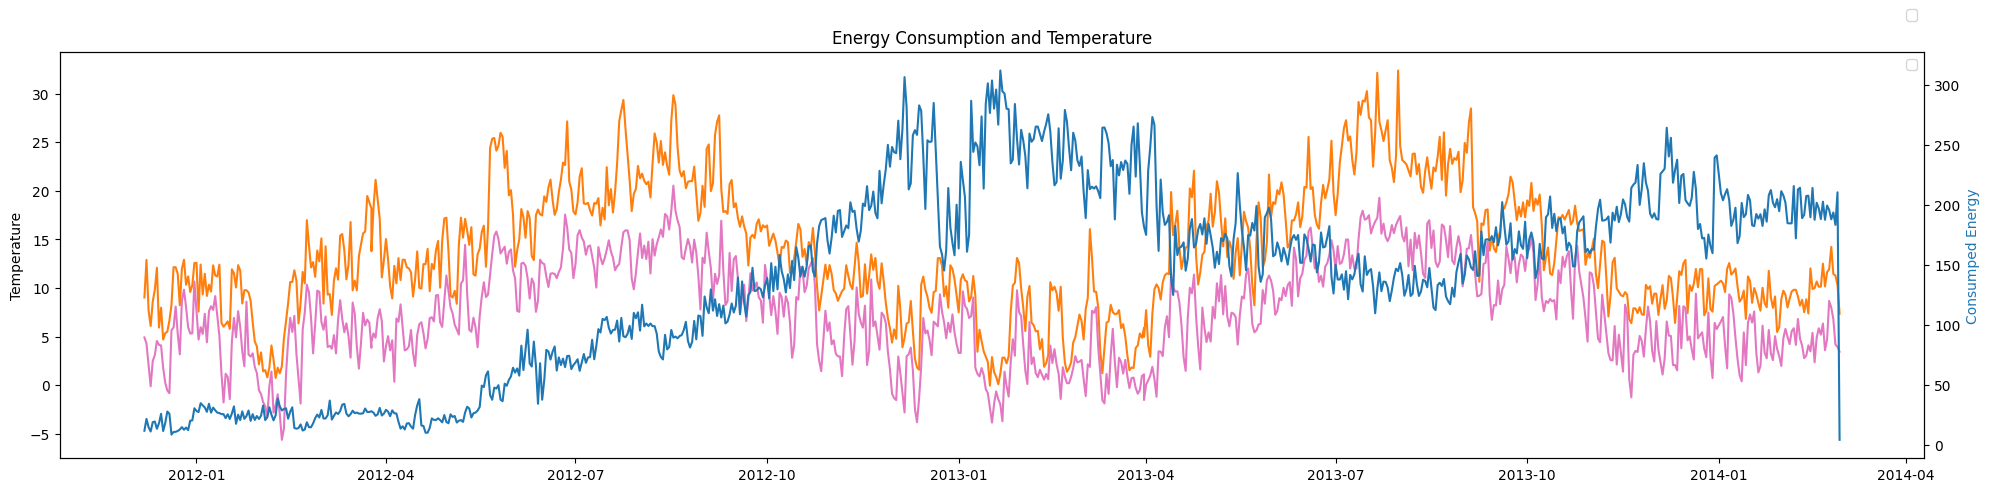

In [17]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color = 'tab:orange')
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color = 'tab:pink')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

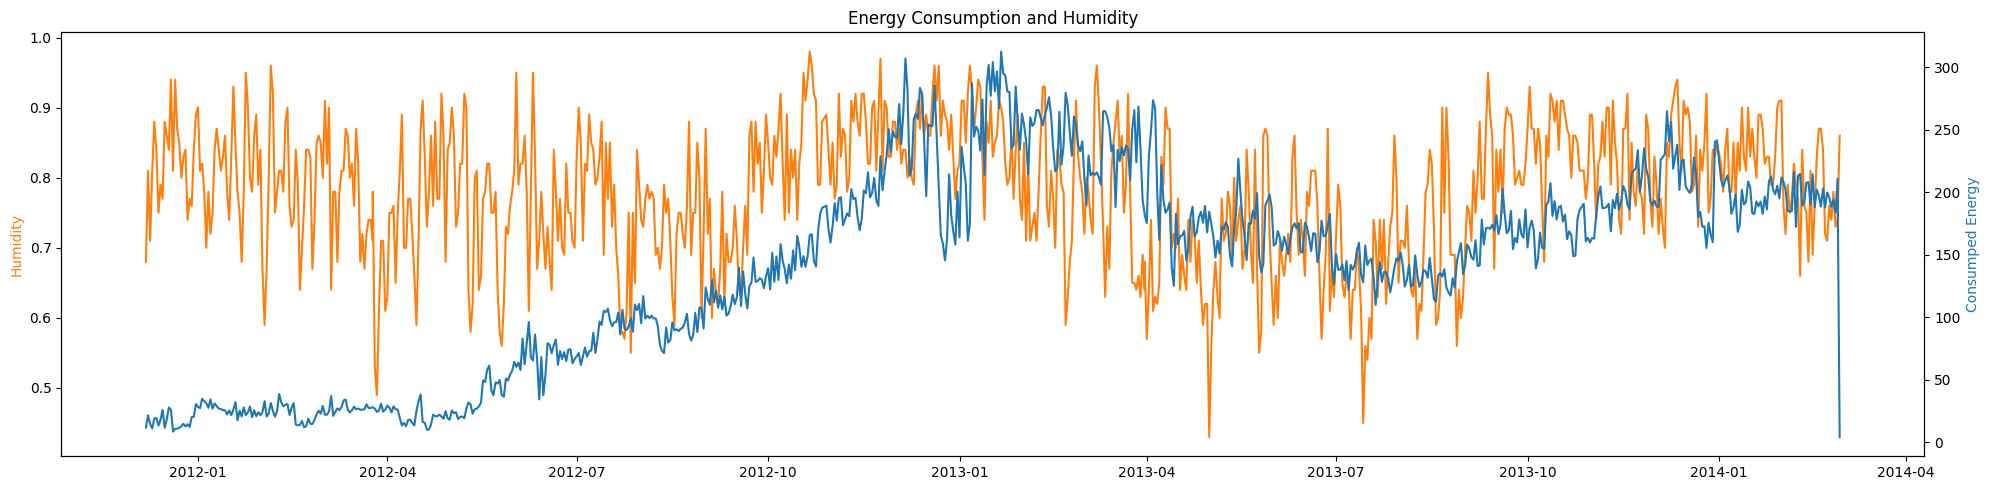

In [18]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.humidity, color = 'tab:orange')
ax1.set_ylabel('Humidity',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()

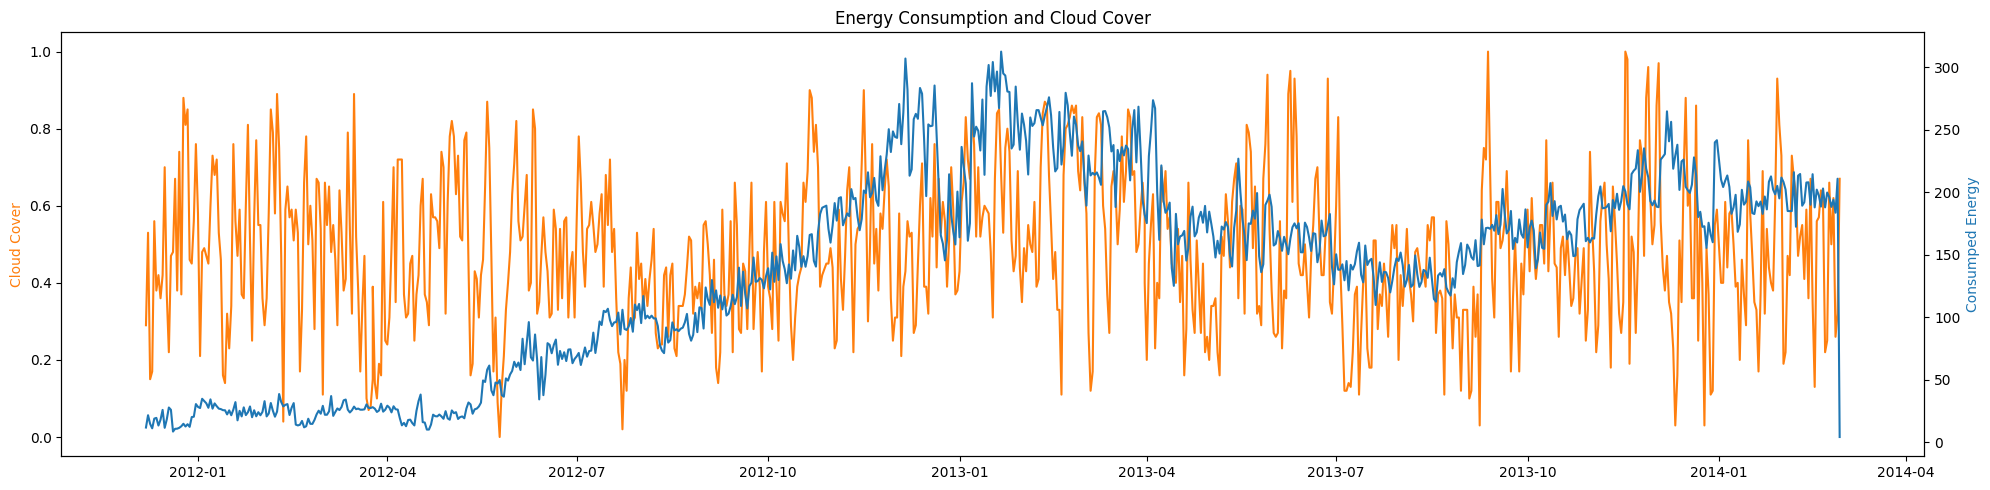

In [19]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.cloudCover, color = 'tab:orange')
ax1.set_ylabel('Cloud Cover',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
plt.title('Energy Consumption and Cloud Cover')
fig.tight_layout()
plt.show()

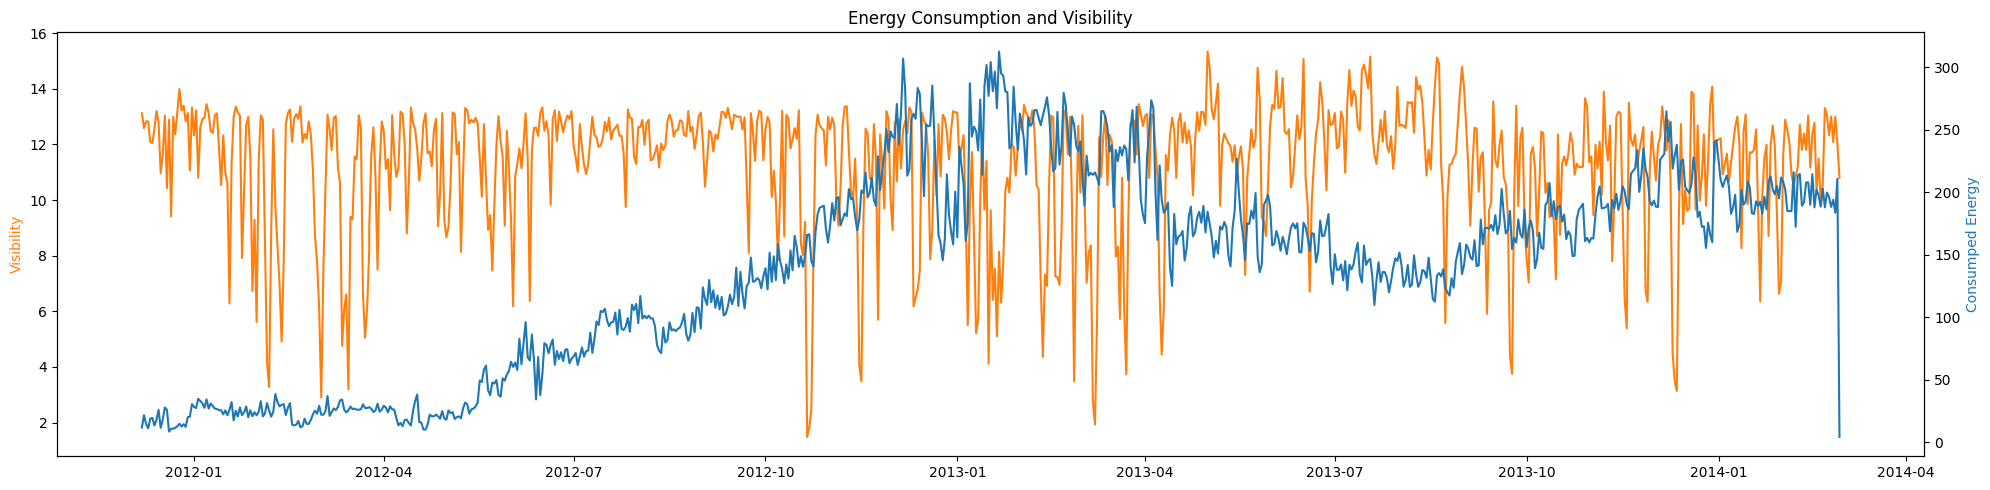

In [20]:
fig, ax1 = plt.subplots(figsize = (20,5))

ax1.plot(weather_energy.day, weather_energy.visibility, color = 'tab:orange')
ax1.set_ylabel('Visibility',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
plt.title('Energy Consumption and Visibility')
fig.tight_layout()
plt.show()

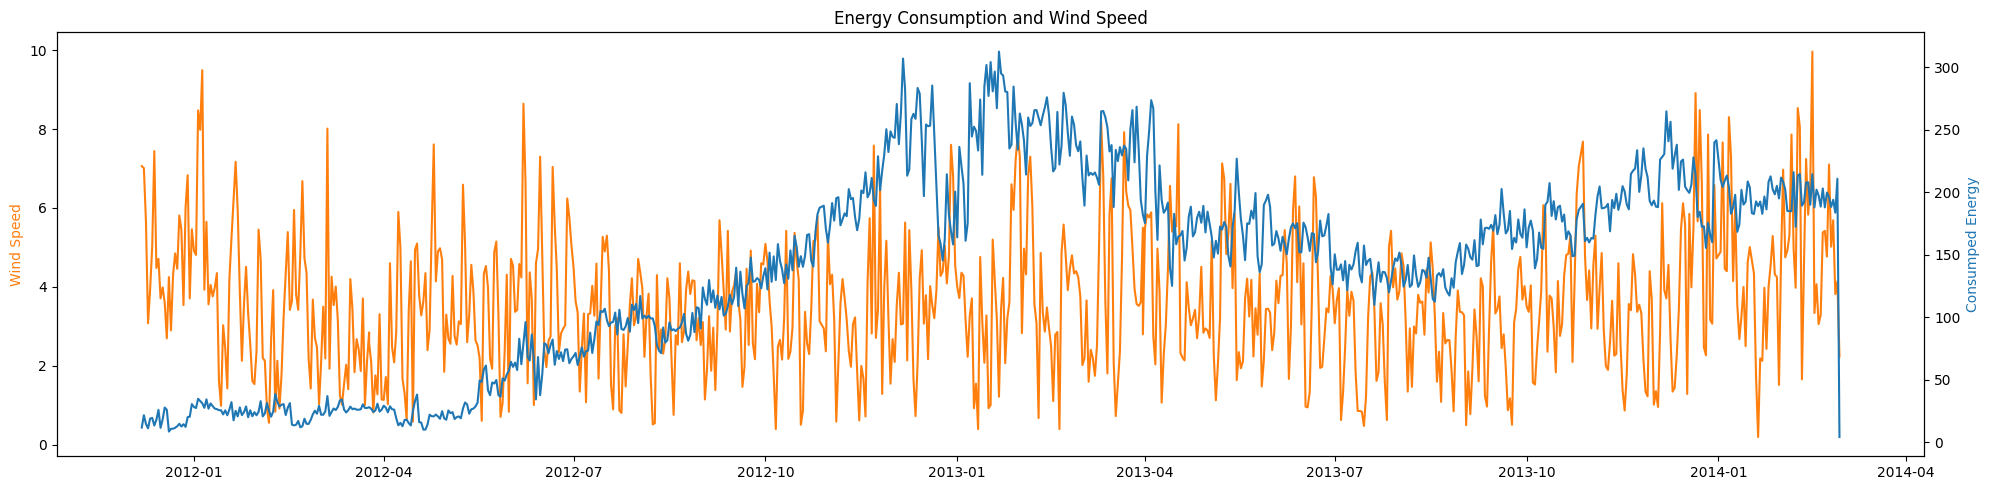

In [21]:
fig, ax1 = plt.subplots(figsize = (20,5))

ax1.plot(weather_energy.day, weather_energy.windSpeed, color = 'tab:orange')
ax1.set_ylabel('Wind Speed',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
plt.title('Energy Consumption and Wind Speed')
fig.tight_layout()
plt.show()

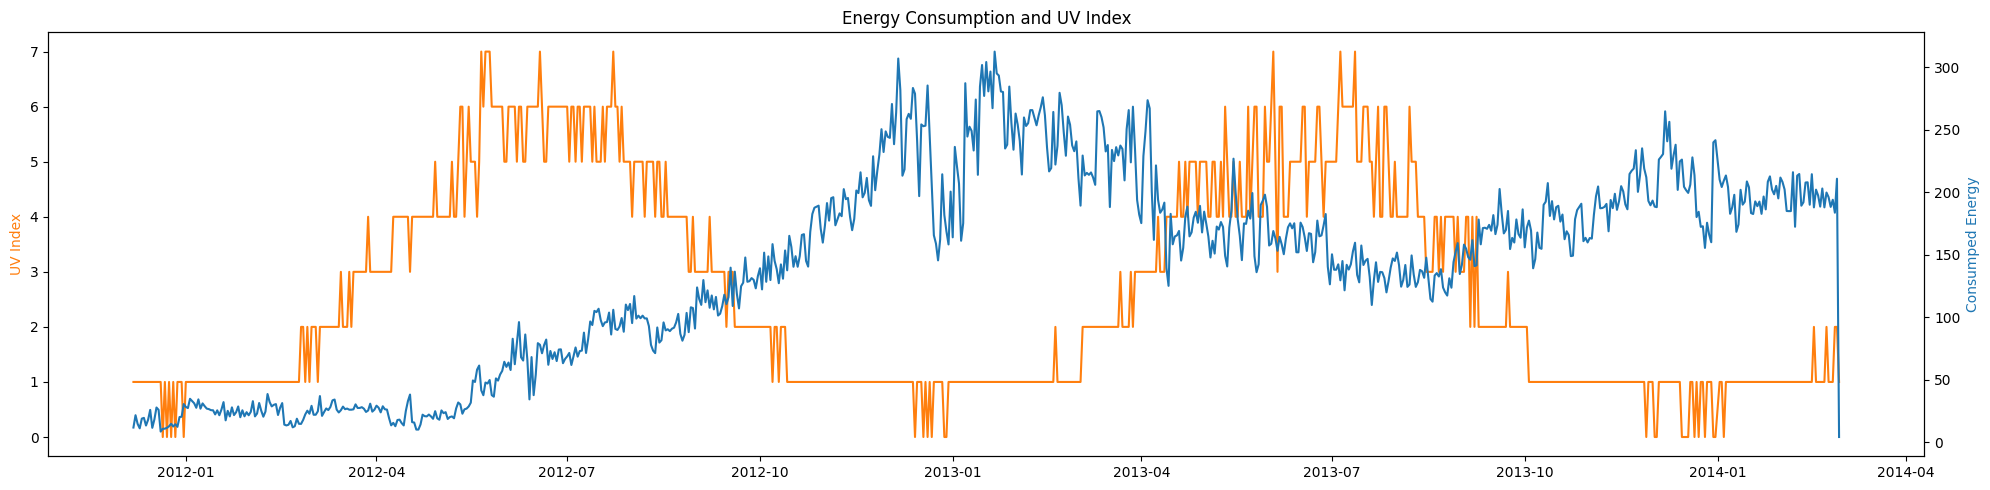

In [22]:
fig, ax1 = plt.subplots(figsize = (20,5))

ax1.plot(weather_energy.day, weather_energy.uvIndex, color = 'tab:orange')
ax1.set_ylabel('UV Index',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
plt.title('Energy Consumption and UV Index')
fig.tight_layout()
plt.show()

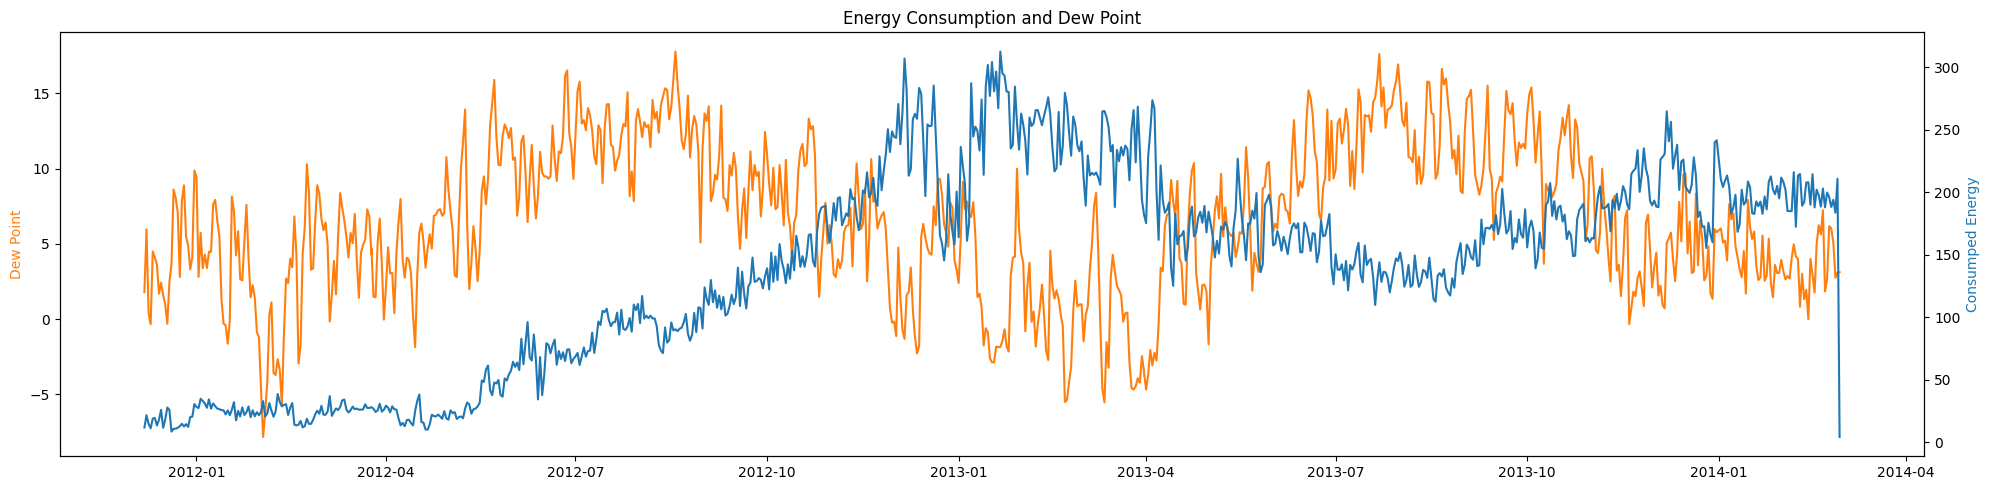

In [23]:
fig, ax1 = plt.subplots(figsize = (20,5))

ax1.plot(weather_energy.day, weather_energy.dewPoint, color = 'tab:orange')
ax1.set_ylabel('Dew Point',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
plt.title('Energy Consumption and Dew Point')
fig.tight_layout()
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_11532\3368255055.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_energy.corr(), cmap = "Blues", annot=True)


Text(0.5, 1.0, 'Correlation heatmap for the Data')

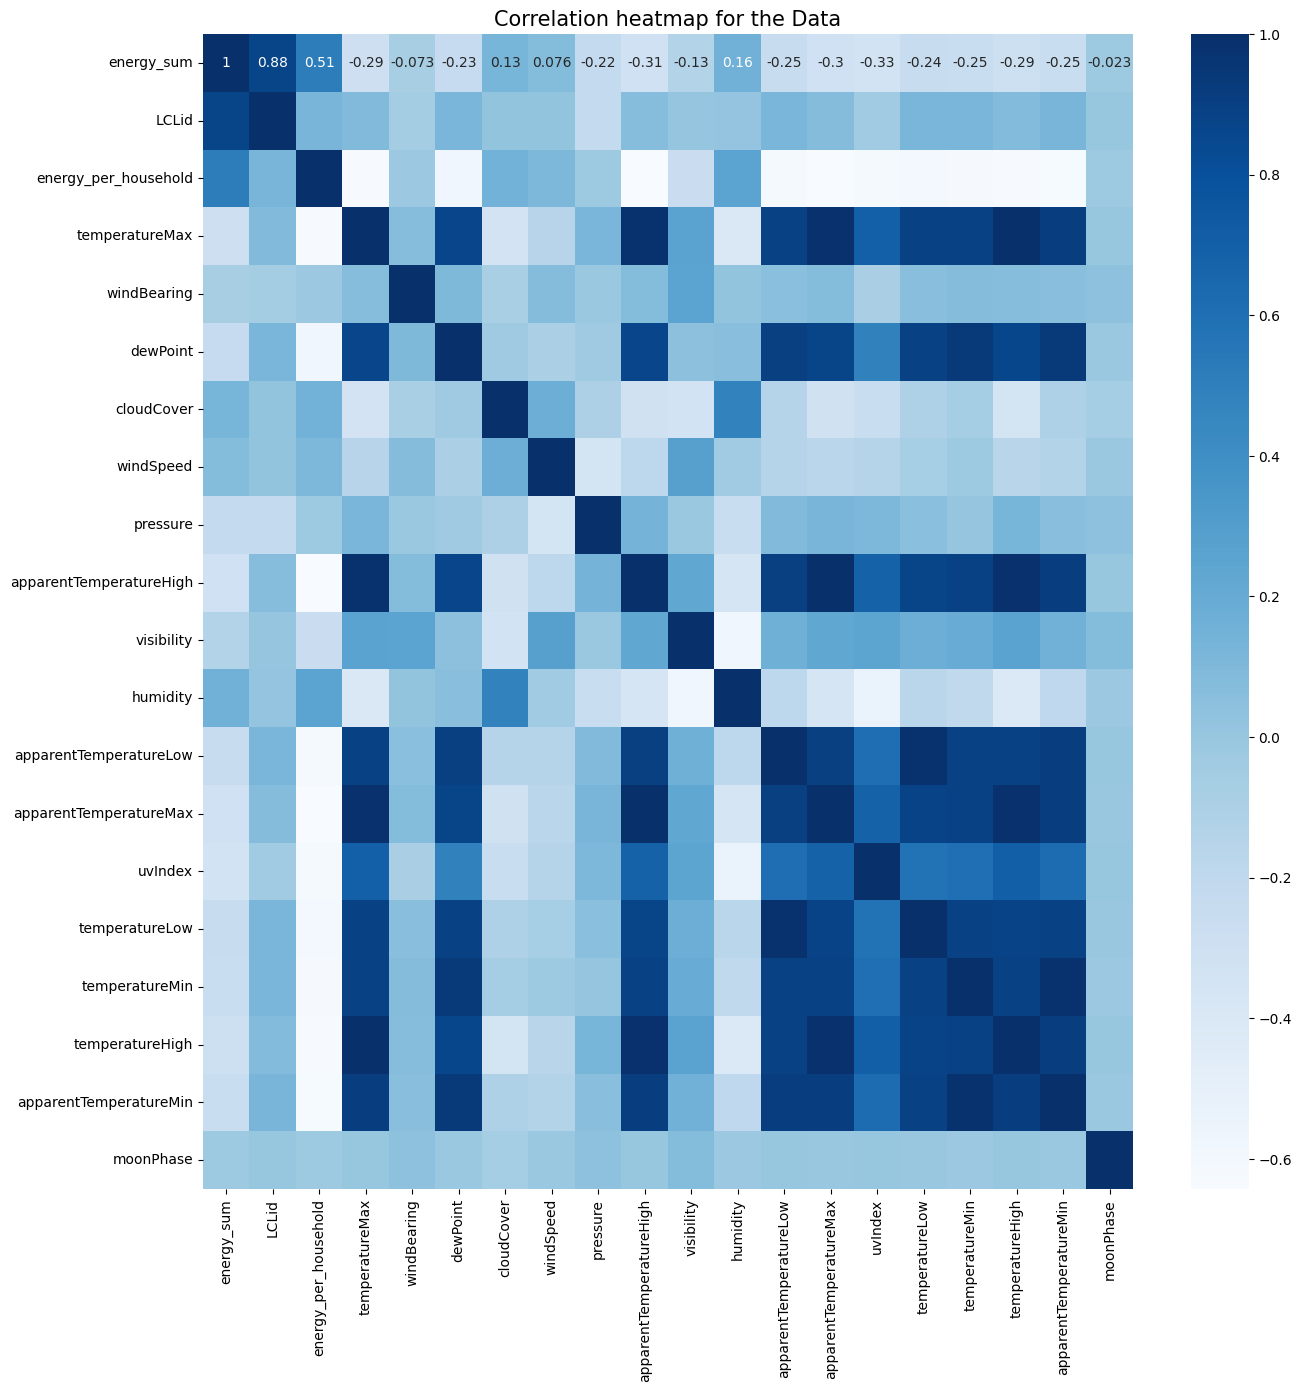

In [24]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(weather_energy.corr(), cmap = "Blues", annot=True)
plt.title('Correlation heatmap for the Data', fontsize = 15)

In [25]:
print(weather_energy.shape)

(814, 21)


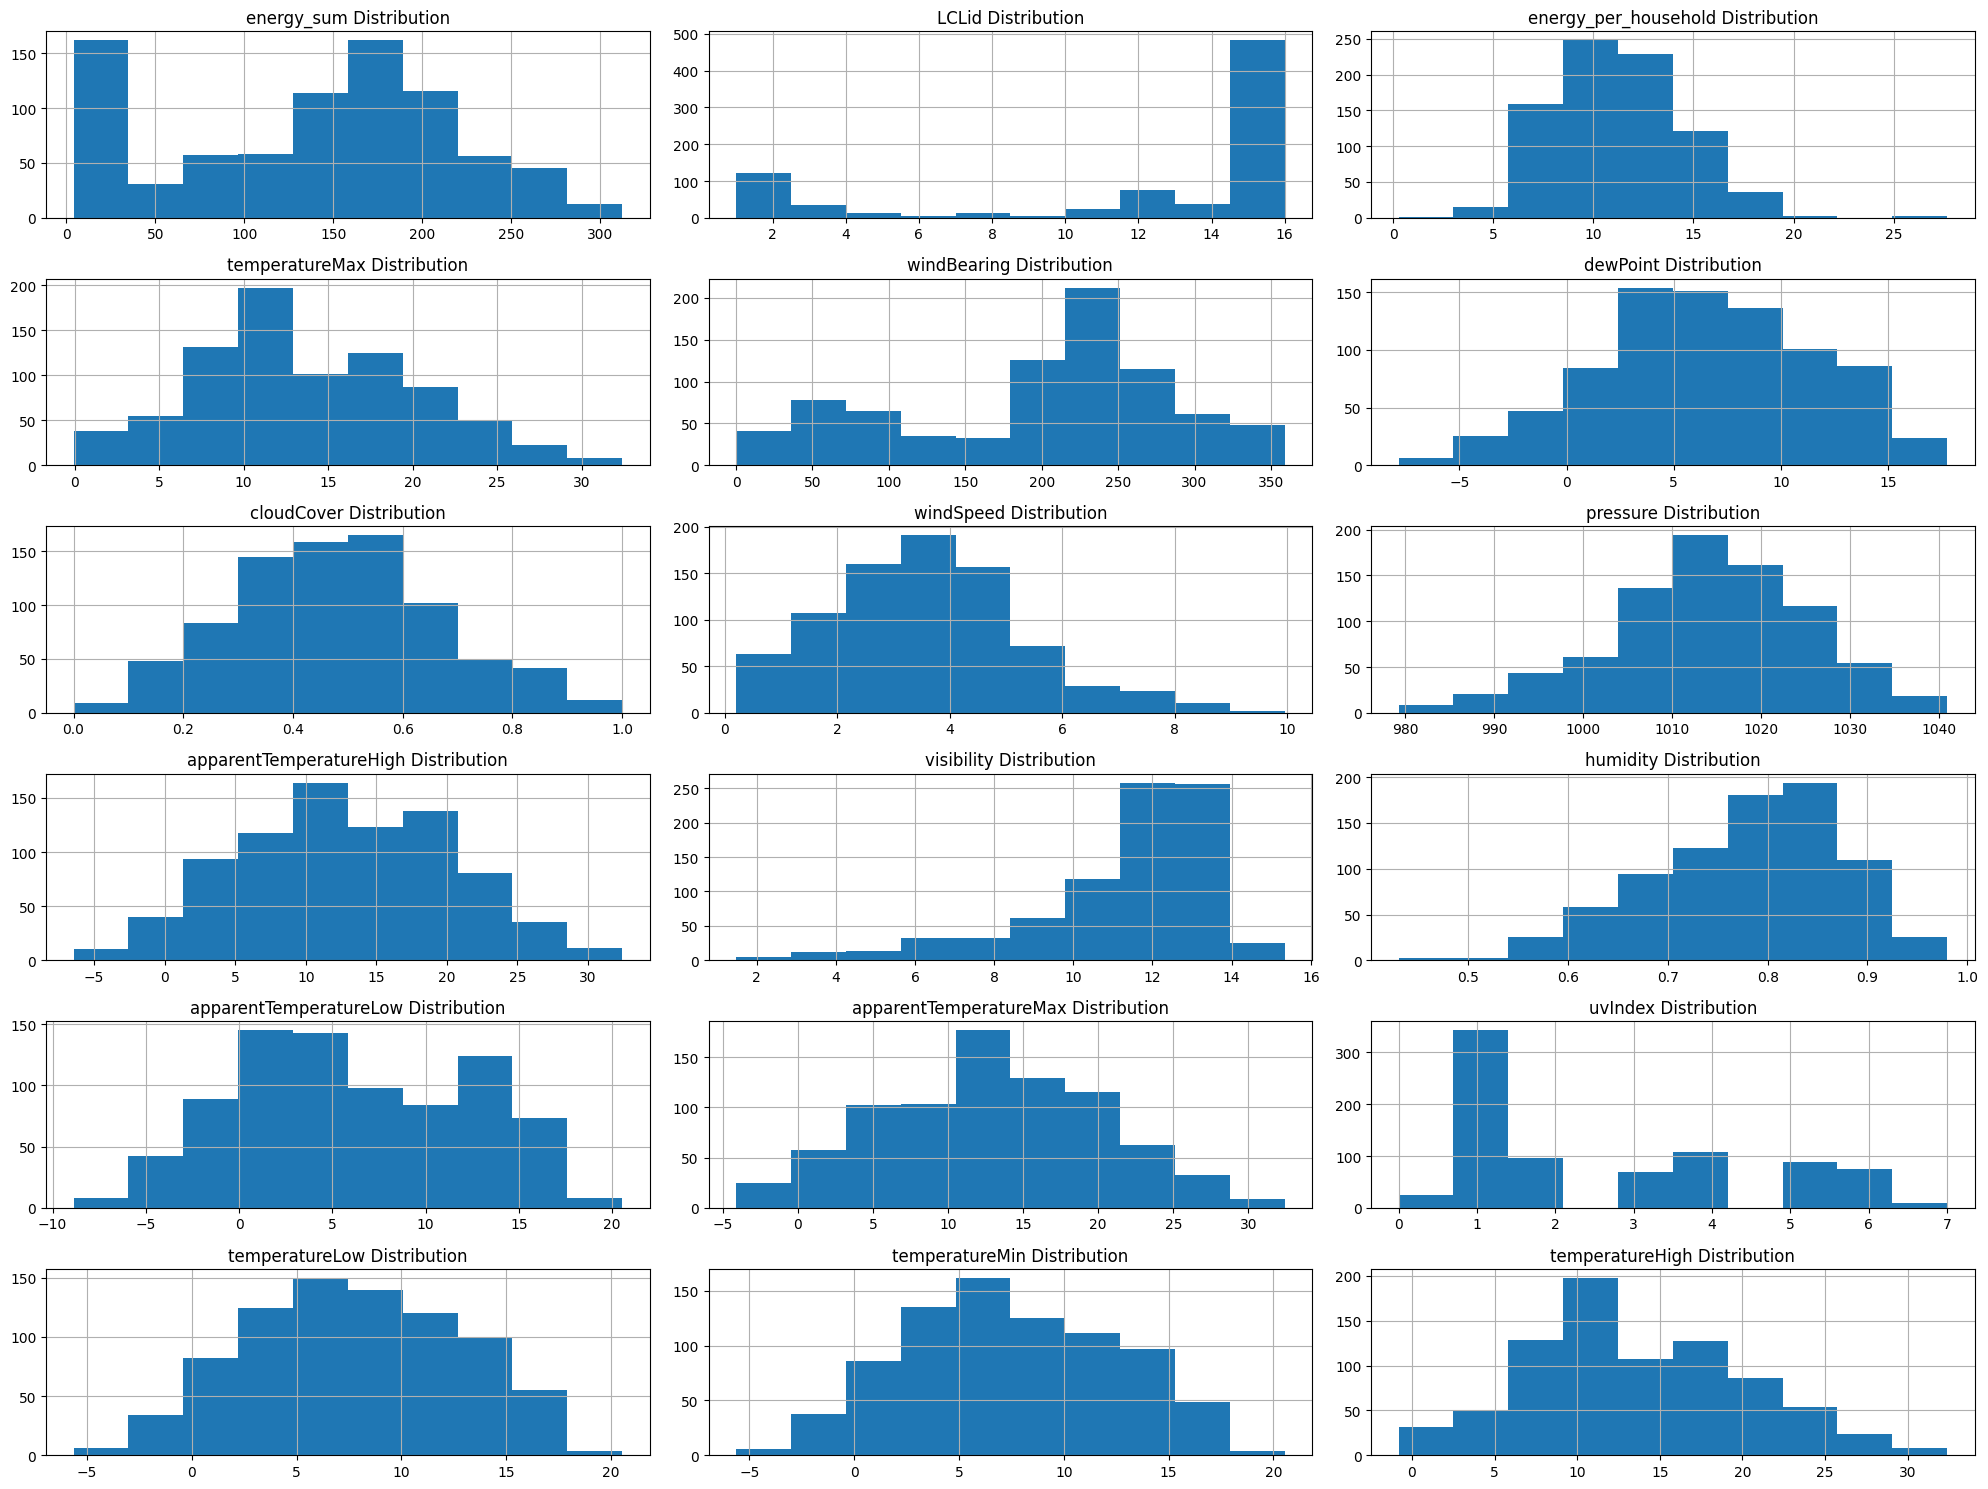

In [26]:
#Observation is that most of the variables distribution are right skewed with long tails and outliers

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(weather_energy, weather_energy.iloc[:,1:19], 6, 3)

In [27]:
weather_energy.head()

,day,energy_sum,LCLid,energy_per_household,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-12-07,11.658,1,11.658,9.02,263,1.79,0.29,7.06,1008.76,...,13.12,0.68,0.63,5.14,1.0,4.27,4.91,9.02,0.94,0.40
1,2011-12-08,21.522,1,21.522,12.89,234,5.96,0.53,7.01,1010.84,...,12.59,0.81,-0.37,12.89,1.0,3.76,4.27,12.89,0.63,0.43
2,2011-12-09,14.564,1,14.564,7.68,255,0.41,0.15,5.65,1010.60,...,12.83,0.71,-3.42,3.99,1.0,-0.13,2.03,7.68,-1.42,0.46
3,2011-12-10,11.032,1,11.032,6.08,247,-0.34,0.17,3.08,1015.58,...,12.83,0.81,0.11,3.14,1.0,2.48,-0.13,6.08,-3.42,0.49
4,2011-12-11,18.789,1,18.789,8.59,198,4.49,0.56,3.94,1007.71,...,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53


In [28]:
weather_energy = weather_energy.merge(holiday, left_on='day', right_on='Bank holidays', how='left')
weather_energy['holiday_ind'] = np.where(weather_energy['Bank holidays'].isna(),0,1)

weather_energy.head()

,day,energy_sum,LCLid,energy_per_household,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Bank holidays,Type,holiday_ind
0,2011-12-07,11.658,1,11.658,9.02,263,1.79,0.29,7.06,1008.76,...,5.14,1.0,4.27,4.91,9.02,0.94,0.40,NaN,NaN,0
1,2011-12-08,21.522,1,21.522,12.89,234,5.96,0.53,7.01,1010.84,...,12.89,1.0,3.76,4.27,12.89,0.63,0.43,NaN,NaN,0
2,2011-12-09,14.564,1,14.564,7.68,255,0.41,0.15,5.65,1010.60,...,3.99,1.0,-0.13,2.03,7.68,-1.42,0.46,NaN,NaN,0
3,2011-12-10,11.032,1,11.032,6.08,247,-0.34,0.17,3.08,1015.58,...,3.14,1.0,2.48,-0.13,6.08,-3.42,0.49,NaN,NaN,0
4,2011-12-11,18.789,1,18.789,8.59,198,4.49,0.56,3.94,1007.71,...,5.72,1.0,3.09,2.48,8.59,0.11,0.53,NaN,NaN,0


In [29]:
weather_energy = weather_energy.drop(['Bank holidays', 'Type'], axis=1)
weather_energy['time'] = (weather_energy['day'] - weather_energy['day'].min())  / np.timedelta64(1,'D')
days = weather_energy['day']
weather_energy = weather_energy.drop(['day'], axis=1)
weather_energy.head()

,energy_sum,LCLid,energy_per_household,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday_ind,time
0,11.658,1,11.658,9.02,263,1.79,0.29,7.06,1008.76,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,0.40,0,0.0
1,21.522,1,21.522,12.89,234,5.96,0.53,7.01,1010.84,12.89,...,-0.37,12.89,1.0,3.76,4.27,12.89,0.63,0.43,0,1.0
2,14.564,1,14.564,7.68,255,0.41,0.15,5.65,1010.60,3.99,...,-3.42,3.99,1.0,-0.13,2.03,7.68,-1.42,0.46,0,2.0
3,11.032,1,11.032,6.08,247,-0.34,0.17,3.08,1015.58,3.14,...,0.11,3.14,1.0,2.48,-0.13,6.08,-3.42,0.49,0,3.0
4,18.789,1,18.789,8.59,198,4.49,0.56,3.94,1007.71,5.62,...,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53,0,4.0


In [30]:
X = weather_energy.drop(['energy_sum'], axis=1)
y = weather_energy[['energy_sum']]

train_ratio = int(len(X) * 0.8)

X_train = X[0:train_ratio]
X_test = X[train_ratio:len(X)]

y_train = y[0:train_ratio]
y_test = y[train_ratio:len(X)]

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ARDRegression, Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regressor
R2 Score: 0.38343928015722173
Root Mean Squared Error: 20.884833864197248
Mean Absolute Percentage Error: 0.23640653825099137


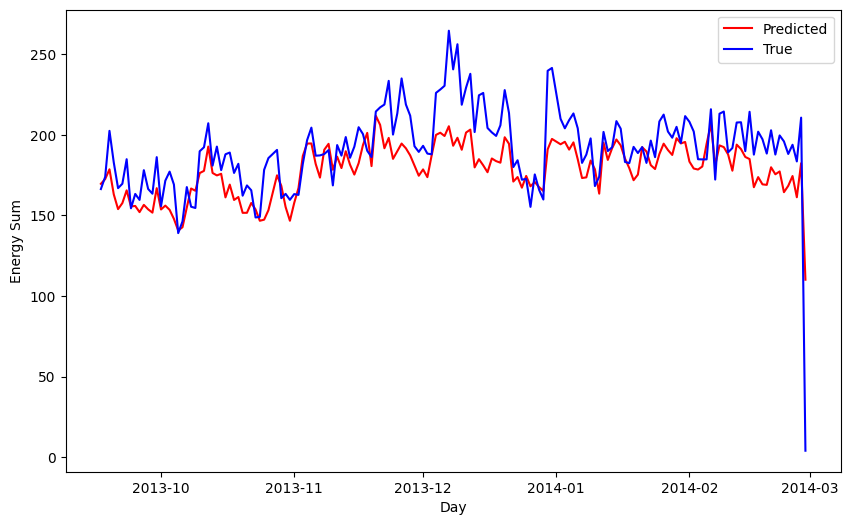

Ridge
R2 Score: 0.4292800570576434
Root Mean Squared Error: 20.093455186964395
Mean Absolute Percentage Error: 0.23457211682527557


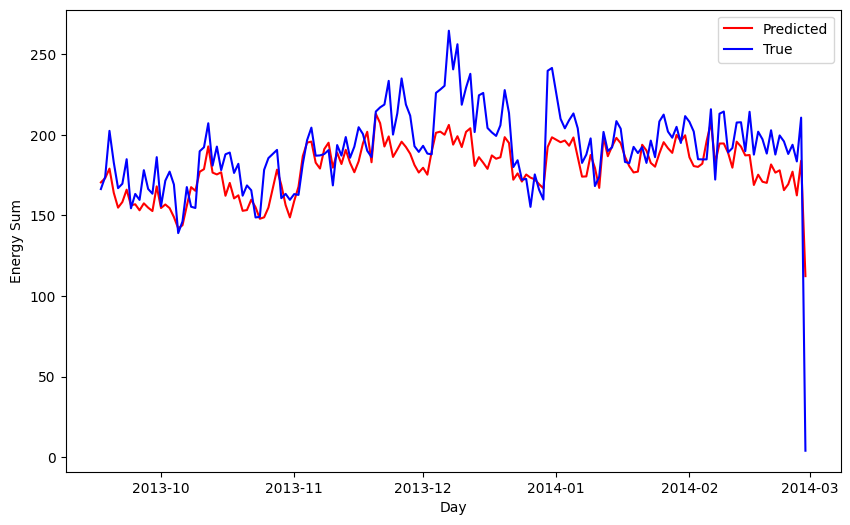

Decision Tree
R2 Score: 0.7143045098234913
Root Mean Squared Error: 14.216568790027425
Mean Absolute Percentage Error: 0.2084789029027509


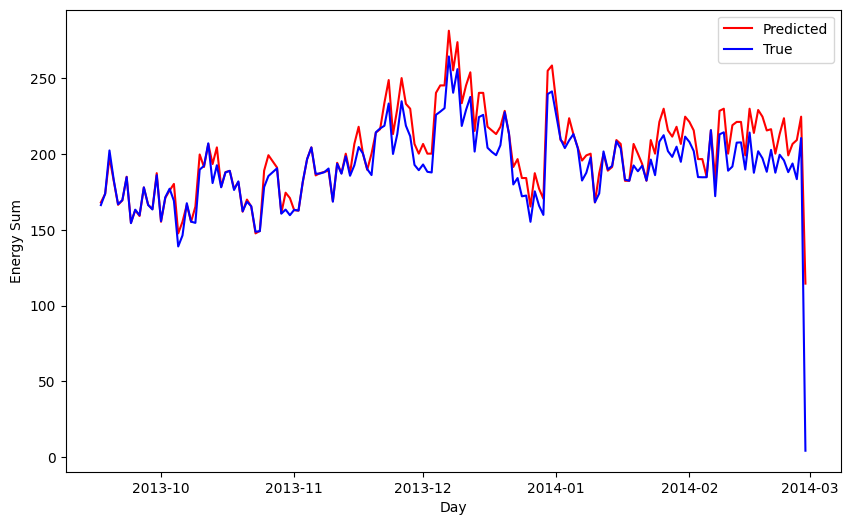

Random Forest
R2 Score: 0.7168219405800359
Root Mean Squared Error: 14.153794931126674
Mean Absolute Percentage Error: 0.20839272331543957


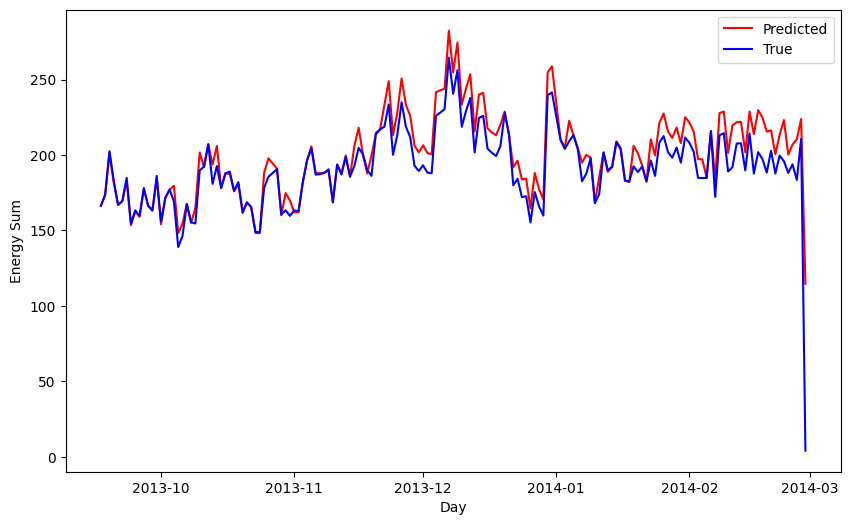

ARD Regressor
R2 Score: 0.4363086480122792
Root Mean Squared Error: 19.969343355947842
Mean Absolute Percentage Error: 0.23297999453335796


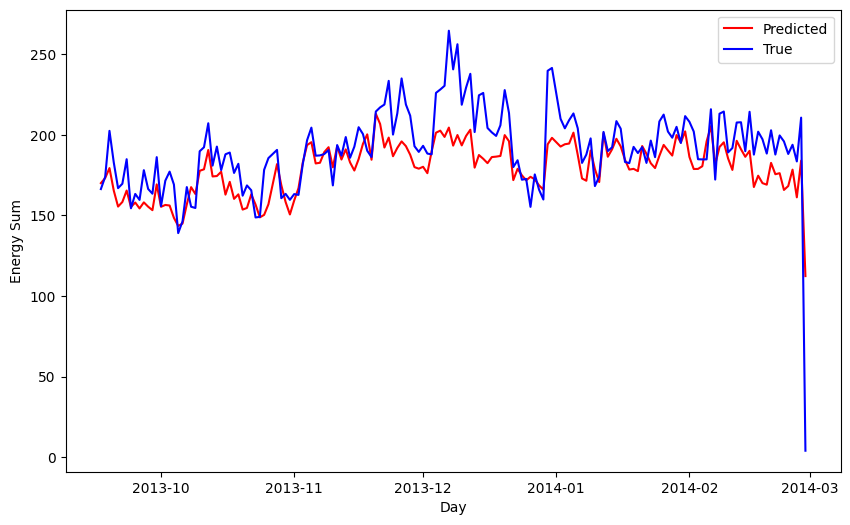

In [32]:
regressors = []

regressors.append(('Linear Regressor', LinearRegression()))
regressors.append(('Ridge', Ridge()))
regressors.append(('Decision Tree', DecisionTreeRegressor()))
regressors.append(('Random Forest', RandomForestRegressor(n_estimators=100, n_jobs=-1)))
regressors.append(('ARD Regressor', ARDRegression()))

for name, model in regressors:
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    result = pd.DataFrame()
    result['Prediction'] = y_pred
    result['True'] = y_test.values.ravel()
    result['Diff'] = y_test.values.ravel() - y_pred
    print(name)
    print("R2 Score: {}".format(r2_score(y_test, y_pred)))
    print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print("Mean Absolute Percentage Error: {}".format(mean_absolute_percentage_error(y_test,y_pred)))
    test_days = days[train_ratio:len(X)]
    plt.figure(figsize=(10, 6))
    plt.plot(test_days, result['Prediction'], color='r', label='Predicted')
    plt.plot(test_days, result['True'], color='b', label='True')
    plt.xlabel('Day')
    plt.ylabel('Energy Sum')
    plt.legend(loc='upper right')
    plt.show()
    

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
regressors = RandomForestRegressor(n_estimators=100, n_jobs=-1)

regressors.fit(X_train, y_train.values.ravel())
y_preds = regressors.predict(X_test)
print("R2 Score: {}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Mean Absolute Percentage Error: {}".format(mean_absolute_percentage_error(y_test,y_pred)))

R2 Score: 0.4363086480122792
Root Mean Squared Error: 19.969343355947842
Mean Absolute Percentage Error: 0.23297999453335796


In [34]:
result = pd.DataFrame()
result['Prediction'] = y_pred
result['True'] = y_test.values.ravel()
result['Diff'] = y_test.values.ravel() - y_pred

In [35]:
test_days = days[train_ratio:len(X)]

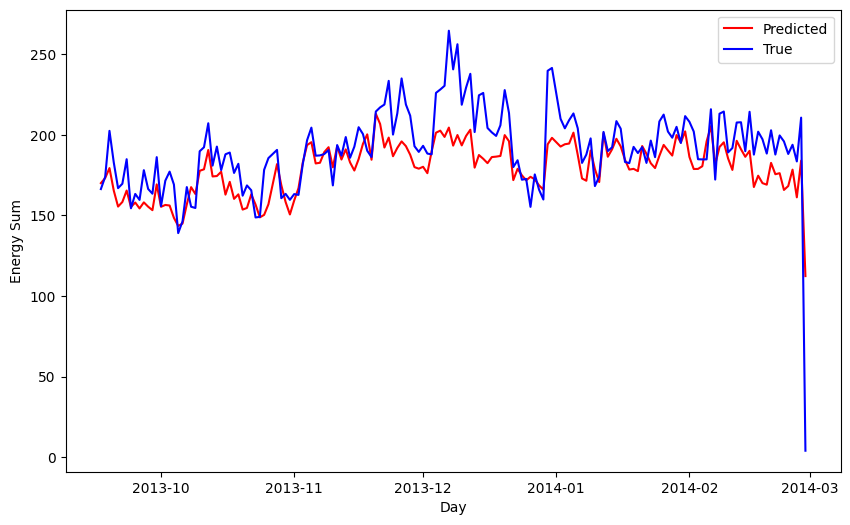

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(test_days, result['Prediction'], color='r', label='Predicted')
plt.plot(test_days, result['True'], color='b', label='True')
plt.xlabel('Day')
plt.ylabel('Energy Sum')
plt.legend(loc='upper right')
plt.show()

SVM
R2 Score: -0.6257896512088148
Root Mean Squared Error: 33.91370793794653
Mean Absolute Percentage Error: 0.3440363787784265


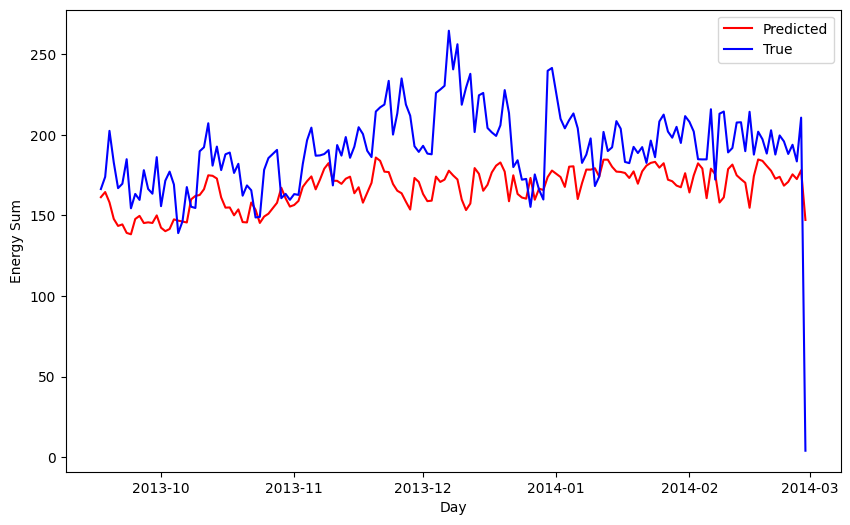

KNN
R2 Score: 0.025127505640955228
Root Mean Squared Error: 26.261347526432402
Mean Absolute Percentage Error: 0.3516867925777969


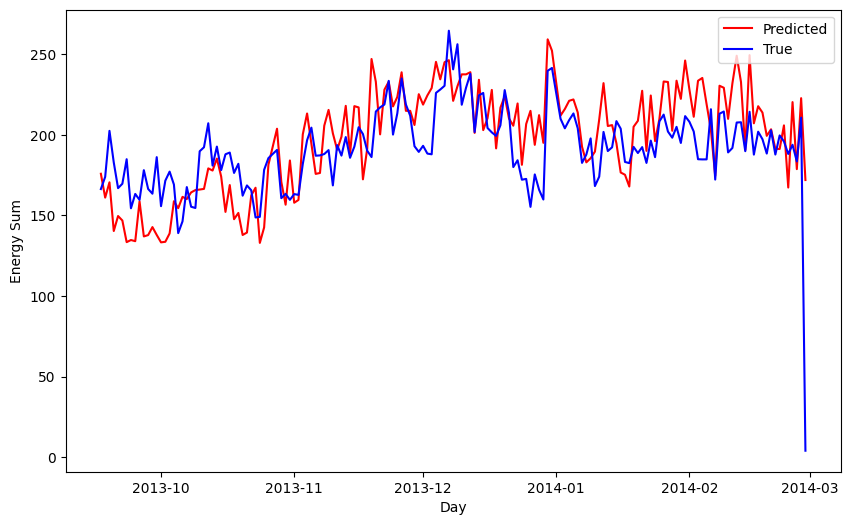

In [37]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Create a list of regressor models
regressors = []

# Add Support Vector Machine Regressor
regressors.append(('SVM', SVR()))

# Add k-Nearest Neighbors Regressor
regressors.append(('KNN', KNeighborsRegressor()))

for name, model in regressors:
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    result = pd.DataFrame()
    result['Prediction'] = y_pred
    result['True'] = y_test.values.ravel()
    result['Diff'] = y_test.values.ravel() - y_pred
    
    
    print(name)
    print("R2 Score: {}".format(r2_score(y_test, y_pred)))
    print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print("Mean Absolute Percentage Error: {}".format(mean_absolute_percentage_error(y_test,y_pred)))
    test_days = days[train_ratio:len(X)]
    plt.figure(figsize=(10, 6))
    plt.plot(test_days, result['Prediction'], color='r', label='Predicted')
    plt.plot(test_days, result['True'], color='b', label='True')
    plt.xlabel('Day')
    plt.ylabel('Energy Sum')
    plt.legend(loc='upper right')
    plt.show()
    

In [38]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
# Load the dataset (replace this with your own data)


# Create individual regression models
svm_model = SVR()  # Support Vector Machine Regressor
knn_model = KNeighborsRegressor()  # k-Nearest Neighbors Regressor
rf_model = RandomForestRegressor()  # Random Forest Regressor

# Train the individual models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions using the individual models
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)


# Create a meta-dataset using the predictions from individual models
meta_dataset = np.column_stack((svm_preds, knn_preds))

# Create an ensemble model (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[
    ('svm', svm_model),
    ('knn', knn_model),
])

# Train the ensemble model on the meta-dataset
ensemble_model.fit(meta_dataset, y_test)

# Make predictions using the ensemble model
ensemble_preds = ensemble_model.predict(meta_dataset)

# Evaluate the performance of the ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_preds)
ensemble_r2 = r2_score(y_test, ensemble_preds)

print(f"Ensemble Mean Squared Error: {ensemble_mse:.2f}")
print(f"Ensemble R-squared: {ensemble_r2:.2f}")


Ensemble Mean Squared Error: 350.37
Ensemble R-squared: 0.50


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


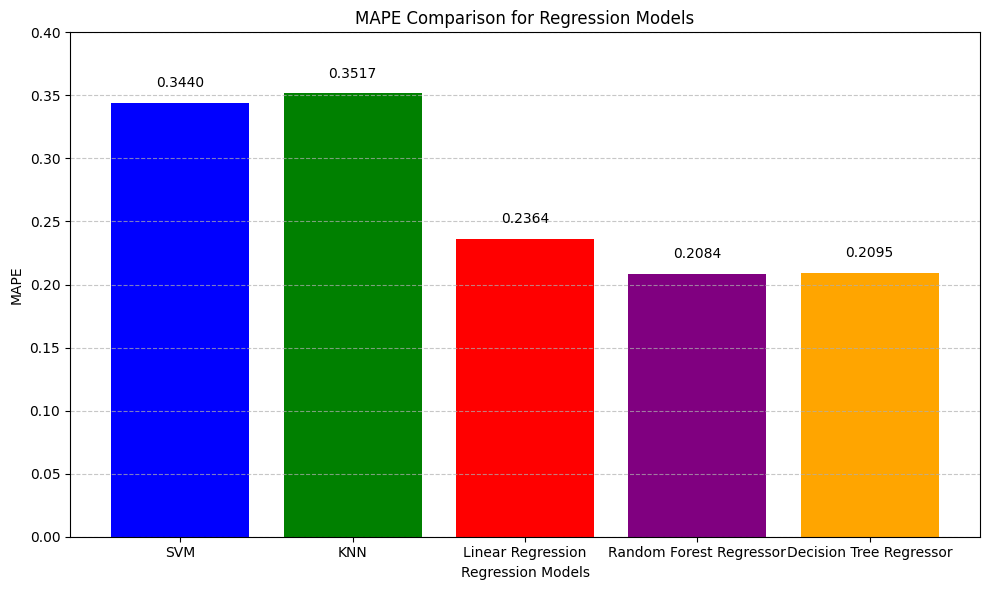

In [1]:
import matplotlib.pyplot as plt

models = ["SVM", "KNN", "Linear Regression", "Random Forest Regressor", "Decision Tree Regressor"]
mape_values = [0.3440363787784265, 0.3516867925777969, 0.23640653825099137, 0.20836263329568103, 0.20945760546255318
]

# Define a list of colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(models, mape_values, color=colors)  # Use the 'colors' list for specifying colors
plt.title('MAPE Comparison for Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('MAPE')
plt.ylim(0, 0.4)  # Adjust the y-axis limit as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of the bars
for i, value in enumerate(mape_values):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
